In [14]:
import numpy as np
import torch
data = np.load('quick_draw_data/ambulance.npy')


148004


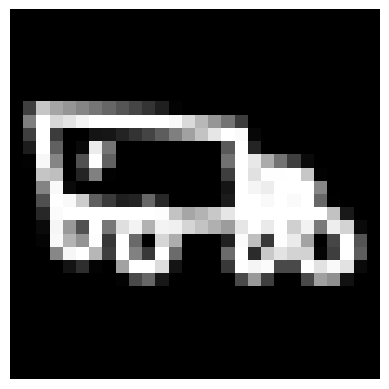

In [15]:
import matplotlib.pyplot as plt

print(len(data))
# Load the first image from the loaded data
image = data[3].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off the axis numbers
plt.show()


In [27]:
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from datasets.doodle_set_0 import DoodleSet

full_dataset = DoodleSet(data_dir='./quick_draw_data', limit=5000)


Total classes in dataset: 50


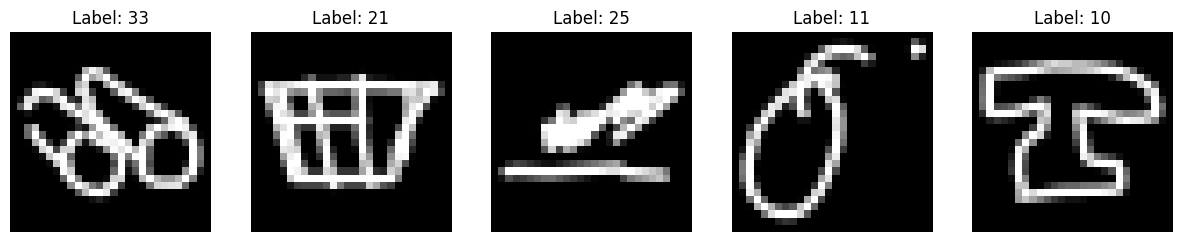

Class 0 - Label: 33, Class Name: binoculars.npy
Class 1 - Label: 21, Class Name: basket.npy
Class 2 - Label: 25, Class Name: beach.npy
Class 3 - Label: 11, Class Name: apple.npy
Class 4 - Label: 10, Class Name: anvil.npy


In [36]:
# 1. Verify Length
print(f"Total classes in dataset: {len(full_dataset)}")

# 2. Sample and Display
num_samples = 5
fig, axs = plt.subplots(1, num_samples, figsize=(15, 3))

for i in range(num_samples):
    all_images, label = full_dataset[i]
    img = all_images[0].reshape(28, 28)

    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Label: {label}")

plt.show()

# 3. Check Labels
for i in range(num_samples):
    _, label = full_dataset[i]
    class_name = list(full_dataset.class_to_idx.keys())[list(full_dataset.class_to_idx.values()).index(label)]
    print(f"Class {i} - Label: {label}, Class Name: {class_name}")

Total number of batches in train_loader: 2


RuntimeError: stack expects each tensor to be equal size, but got [120890, 784] at entry 0 and [149736, 784] at entry 1

In [ ]:
from models.simple_cnn import SimpleCNN
import torch.nn as nn

model = SimpleCNN(num_classes=len(train_dataset.class_to_idx))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target, _) in enumerate(train_loader):  # "_" is for text labels, which we won't use here
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")
